# Obstructive Sleep Apnea Syndrome (OSAS) Dataset Pre processing
We use a publicly available dataset - [OSASUD](https://www.nature.com/articles/s41597-022-01272-y) (available [here](https://figshare.com/collections/A_dataset_of_stroke_unit_recordings_for_the_detection_of_Obstructive_Sleep_Apnea_Syndrome/5630890) to train a model to detect whether a patient is healthy or has any of the OSAS subtypes - HYPOPNEA, APNEA-CENTRAL, APNEA-OBSTRUCTIVE, APNEA-MIXED.
Dataset reference-
Bernardini A, Brunello A, Gigli GL, Montanari A, Saccomanno N. OSASUD: A dataset of stroke unit recordings for the detection of Obstructive Sleep Apnea Syndrome. Scientific Data. 2022 Apr;9(1):177. DOI: 10.1038/s41597-022-01272-y. PMID: 35440646; PMCID: PMC9018698.

## Imports

In [73]:
# Necessary imports
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt
from data_utils import create_patient_map_features, convert_to_numpy_dataset
import heartpy as hp

## Data loading
The data is a pandas dataframe stored in 'data' folder as a _.pickle_ file. We load it and display the first few rows and the datatypes of each column

In [3]:
# Path to the dataset (assuming it is in the same directory as the notebook)
path = './data/dataset_OSAS.pickle'
# Loading the dataset
# dataset = pd.read_pickle(path)
with open(path, 'rb') as file:
    dataset = pickle.load(file)

In [4]:
dataset

,patient,timestamp_datetime,HR(bpm),SpO2(%),PI(%),RR(rpm),PVCs(/min),event,anomaly,signal_pleth,signal_ecg_i,signal_ecg_ii,signal_ecg_iii,PSG_Abdomen,PSG_Flow,PSG_Position,PSG_Snore,PSG_Thorax
0,1,2019-07-29 21:00:36,63.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[122, 121, 121, 120, 121, 123, 124, 125, 125, ...","[122, 121, 121, 120, 120, 122, 123, 124, 125, ...","[128, 128, 129, 128, 127, 127, 127, 128, 128, ...","[-0.8741500623767957, -0.9144675352463544, -0....","[-2.96563402995406, -2.9595796764374294, -2.95...","[-0.47401902530550133, -0.4739045513646679, -0...","[0.07924500093530636, 0.03509163903208667, 0.1...","[-0.3731332842321416, -0.3840816526328088, -0...."
1,1,2019-07-29 21:00:37,63.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[124, 125, 125, 124, 124, 124, 124, 124, 124, ...","[123, 124, 123, 123, 123, 122, 123, 123, 123, ...","[127, 127, 127, 127, 127, 126, 127, 128, 127, ...","[-0.9881929400632088, -0.9477638031010281, -0....","[-1.361721983810798, -0.5937676928280333, 0.10...","[-0.47401917910760316, -0.4739043984870266, -0...","[0.1730628474409785, 0.05274774088651335, 0.07...","[-0.3271092235750278, -0.34422787330023297, -0..."
2,1,2019-07-29 21:00:38,64.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[124, 124, 124, 124, 123, 124, 124, 124, 124, ...","[123, 124, 124, 124, 124, 124, 124, 124, 124, ...","[127, 128, 128, 128, 129, 128, 128, 128, 128, ...","[0.08614440036034249, 0.2516121296765992, 0.42...","[1.106683267015266, 1.0603761242579164, 1.0141...","[-0.4740193239619996, -0.47390425449218476, -0...","[0.17804040728101125, 0.11939900653197982, 0.1...","[-0.12950805941595078, -0.11899340882221601, -..."
3,1,2019-07-29 21:00:39,64.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[124, 124, 124, 124, 123, 124, 123, 123, 124, ...","[126, 126, 126, 126, 126, 125, 126, 126, 126, ...","[130, 130, 130, 130, 131, 129, 131, 131, 131, ...","[1.1531959630520392, 1.1005866213221034, 1.014...","[-0.9214725025271104, -0.9771933825390473, -1....","[-0.4740194604923075, -0.4739041187620709, -0....","[0.04909074879934492, 0.1211243456818879, 0.20...","[0.014197466691675964, 0.05145753481049522, 0...."
4,1,2019-07-29 21:00:40,64.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[123, 124, 125, 124, 124, 124, 124, 124, 124, ...","[128, 127, 126, 125, 126, 127, 126, 125, 125, ...","[133, 131, 129, 129, 130, 131, 130, 130, 129, ...","[-0.42549812754662325, -0.5447443993201948, -0...","[-1.035218708573095, -1.0000002320633845, -0.9...","[-0.47401958926922777, -0.47390399073098, -0.4...","[0.020529048615559067, 0.5111613725192, 0.0863...","[-0.004534125269965855, -0.04243555140344553, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961352,9,2019-09-06 06:16:54,81.0,95.0,2.71,16.0,0.0,NONE,False,"[131, 127, 125, 121, 117, 115, 113, 111, 109, ...","[127, 123, 128, 133, 131, 130, 131, 132, 131, ...","[125, 124, 125, 127, 129, 131, 132, 133, 134, ...","[126, 130, 126, 122, 126, 129, 129, 130, 132, ...","[-1.9320951225069571, -1.9748028503102615, -1....","[-0.8905074271823522, -0.6970566985941882, -0....","[-0.8119689723625771, -0.8106901225226955, -0....","[0.1527778523432962, 0.08275972256310686, 0.03...","[-0.7717241223399193, -0.7413117227735206, -0...."
961353,9,2019-09-06 06:16:55,81.0,95.0,2.72,16.0,0.0,NONE,False,"[86, 84, 82, 80, 78, 78, 76, 74, 72, 72, 70, 7...","[126, 122, 126, 124, 124, 127, 123, 126, 126, ...","[122, 120, 121, 122, 122, 123, 122, 123, 122, ...","[124, 126, 123, 126, 126, 124, 127, 125, 124, ...","[1.2616332699372026, 1.2624144004802997, 1.031...","[-0.7244347160594141, -0.9816192982602411, -1....","[-0.3727779079327947, -0.7602549701261998, -0....","[0.199456605530088, 0.31400967952462544, 0.033...","[-0.46111251456845126, -0.4781256154575427, -0..."
961354,9,2019-09-06 06:16:56,81.0,95.0,2.7

### Number of classes
We display the class names that the model needs to classify

In [5]:
num_classes = dataset['event'].unique()
print(num_classes)

['NONE' 'HYPOPNEA' 'APNEA-CENTRAL' 'APNEA-OBSTRUCTIVE' 'APNEA-MIXED']


As we can see from above, this is a five class classification problem.

Now we display some basic information about the dataset

## Patient wise re-assembly
We create a python dictionary that has the patient id as keys and all the features are encoded as another dictionary which is the value of patient key.

In [6]:
patient_map_features = create_patient_map_features(path)

Processed patients: 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


## Converting to Numpy Array

In [7]:
numpy_data_dict = convert_to_numpy_dataset(patient_map_features)

Processed patients:   7%|▋         | 2/30 [00:00<00:01, 16.59it/s]

Patient 1  >  Discarding the last 38 seconds.
Patient 10  >  Discarding the last 18 seconds.
Patient 11  >  Discarding the last 40 seconds.
Patient 12  >  Discarding the last 26 seconds.


Processed patients:  20%|██        | 6/30 [00:00<00:01, 17.00it/s]

Patient 13  >  Discarding the last 16 seconds.
Patient 14  >  Discarding the last 20 seconds.
Patient 15  >  Discarding the last 45 seconds.
Patient 16  >  Discarding the last 20 seconds.


Processed patients:  33%|███▎      | 10/30 [00:00<00:01, 17.29it/s]

Patient 17  >  Discarding the last 7 seconds.
Patient 18  >  Discarding the last 55 seconds.
Patient 2  >  Discarding the last 37 seconds.
Patient 19  >  Discarding the last 11 seconds.


Processed patients:  47%|████▋     | 14/30 [00:00<00:01, 15.81it/s]

Patient 20  >  Discarding the last 13 seconds.
Patient 21  >  Discarding the last 50 seconds.
Patient 22  >  Discarding the last 32 seconds.
Patient 23  >  Discarding the last 6 seconds.


Processed patients:  67%|██████▋   | 20/30 [00:01<00:00, 20.62it/s]

Patient 24  >  Discarding the last 32 seconds.
Patient 25  >  Discarding the last 38 seconds.
Patient 26  >  Discarding the last 53 seconds.
Patient 3  >  Discarding the last 2 seconds.
Patient 27  >  Discarding the last 32 seconds.
Patient 28  >  Discarding the last 2 seconds.


Processed patients:  77%|███████▋  | 23/30 [00:01<00:00, 18.44it/s]

Patient 29  >  Discarding the last 58 seconds.
Patient 30  >  Discarding the last 37 seconds.
Patient 4  >  Discarding the last 17 seconds.


Processed patients:  90%|█████████ | 27/30 [00:01<00:00, 11.27it/s]

Patient 5  >  Discarding the last 41 seconds.
Patient 6  >  Discarding the last 30 seconds.
Patient 7  >  Discarding the last 28 seconds.
Patient 8  >  Discarding the last 57 seconds.


Processed patients:  97%|█████████▋| 29/30 [00:02<00:00,  6.77it/s]

Patient 9  >  Discarding the last 16 seconds.


Processed patients: 100%|██████████| 30/30 [00:02<00:00, 11.10it/s]


(16008, 60, 5) (16008, 60, 80, 4) (16008, 60, 10, 5) (16008, 60, 2)
16008 5 4 5 2


In [8]:
derived_data = numpy_data_dict['derived_data']
waveform_data = numpy_data_dict['waveform_data']
psg_data = numpy_data_dict['psg_data']
label_data = numpy_data_dict['label_data']

## Data preprocessing

### Checking Derived data

In [9]:
print("Shape of derived data:", derived_data.shape)
num_derived_features = derived_data.shape[-1]

Shape of derived data: (16008, 60, 5)


There are five features in the derived data - ['HR(bpm)', 'SpO2(%)', 'PI(%)', 'RR(rpm)', 'PVCs(/min)']
We will examine each of them separately

We will reshape the data such that it only contains rows of features only

In [10]:
derived_data = np.reshape(derived_data, (-1, num_derived_features))
print("Reshaped derived data:", derived_data.shape)

Reshaped derived data: (960480, 5)


Finding NaN values and storing their row numbers

In [11]:
nan_indices = np.isnan(derived_data).any(axis=1)    # If any of the 5 features (values in axis 1) is NaN
derived_nan_row_numbers = np.where(nan_indices == True)[0]
print("Number of NaN samples in derived data:", len(derived_nan_row_numbers))

Number of NaN samples in derived data: 146839


### Checking Waveform data

In [12]:
print("Shape of waveform data:", waveform_data.shape)
num_waveform_features = waveform_data.shape[-1]
print("Number of waveform features:", num_waveform_features)

Shape of waveform data: (16008, 60, 80, 4)
Number of waveform features: 4


We will reshape the data such that it only contains rows of features only (80 x 4).

In [13]:
# Avera ge the 80 signals for each second into one signal.
# Hence, we get one signal value for one second.

waveform_data = np.reshape(waveform_data, (-1, 80, num_waveform_features))

In [14]:
nan_indices = np.isnan(waveform_data).any(axis=2)   # If any of the 4 features (values in axis 2) is NaN
waveform_nan_row_numbers = np.where(np.any(nan_indices == True, axis=1))[0]
print("Number of NaN samples:", len(waveform_nan_row_numbers))

Number of NaN samples: 154706


### Checking PSG data

In [15]:
print("Shape of PSG data:", psg_data.shape)
num_psg_features = psg_data.shape[-1]
print("Number of PSG features:", num_psg_features)

Shape of PSG data: (16008, 60, 10, 5)
Number of PSG features: 5


In [16]:
psg_data = np.reshape(psg_data, (-1, 10, num_psg_features))
print("Reshaped PSG data:", psg_data.shape)

Reshaped PSG data: (960480, 10, 5)


In [17]:
nan_indices = np.isnan(psg_data).any(axis=1)    # If any of the 5 features (values in axis 1) is NaN
psg_nan_row_numbers = np.where(np.any(nan_indices == True, axis=1))[0]  # Get row numbers where any value in the 2nd dimension is True
print("Number of NaN samples in psg data:", len(psg_nan_row_numbers))

Number of NaN samples in psg data: 0


There are No NaN values in PSG data

### Label data
Reshaping the label data to maintain the same number of rows as the feature arrays

In [18]:
label_data = label_data.reshape((-1, label_data.shape[-1]))
print("Reshaped label data shape:", label_data.shape)

Reshaped label data shape: (960480, 2)


### NaN Removal

Now, we need to combine the derived, waveform and psg data such that any row in derived or waveform data that has NaN should be discarded.
But the order should be maintained, i.e., if row x for derived data has NaN but row x for waveform does'nt, the entire row for derived, waveform and psg should be discarded. Hence, we take only those rows that have non-NaN values for all the three types of data.

In [19]:
# Combine all the nan row numbers of the three datatypes into one list
final_nan_row_numbers = np.concatenate((derived_nan_row_numbers, waveform_nan_row_numbers, psg_nan_row_numbers), axis=0)
# Keep only the unique values (remove duplicates)
final_nan_row_numbers = np.unique(final_nan_row_numbers)
final_nan_row_numbers.shape

(170548,)

Remove the rows indicated in `final_nan_row_numbers` from `derived_data`, `waveform_data`, `psg_data` and `label_data`

In [20]:
derived_data_cleaned = np.delete(derived_data, final_nan_row_numbers, axis=0)
waveform_data_cleaned = np.delete(waveform_data, final_nan_row_numbers, axis=0)
psg_data_cleaned = np.delete(psg_data,final_nan_row_numbers, axis=0)
label_data_cleaned = np.delete(label_data, final_nan_row_numbers, axis=0)
print("Shapes")
print("Derived Data:", derived_data_cleaned.shape)
print("Waveform Data:", waveform_data_cleaned.shape)
print("PSG Data:", psg_data_cleaned.shape)
print("Label Data:", label_data_cleaned.shape)

Shapes
Derived Data: (789932, 5)
Waveform Data: (789932, 80, 4)
PSG Data: (789932, 10, 5)
Label Data: (789932, 2)


### Outlier Removal

#### Outliers in Derived Data

<Axes: >

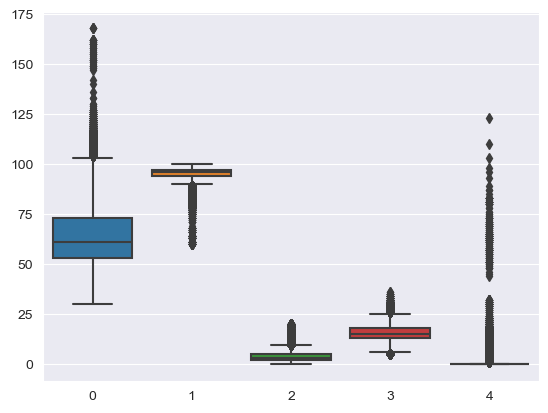

In [21]:
sns.boxplot(data=derived_data_cleaned)

#### Outliers in Waveform Data

<Axes: >

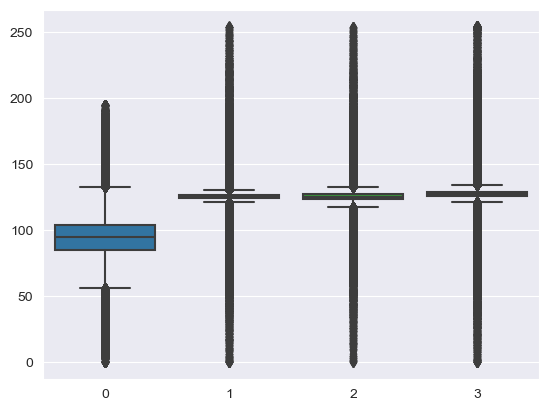

In [22]:
sns.boxplot(data=np.mean(waveform_data_cleaned, axis=1))

#### Outliers in PSG data

<Axes: >

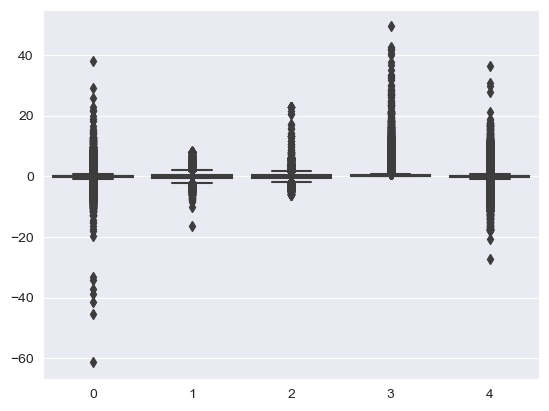

In [23]:
sns.boxplot(data=np.mean(psg_data_cleaned, axis=1))

#### Finding outliers

In [24]:
def find_outliers(array, max_deviations=2):
    """
    Code courtesy: https://www.adamsmith.haus/python/answers/how-to-remove-outliers-from-a-numpy-array-in-python
    :param array: numpy array from which we need to remove the outliers
    :param max_deviations: number of standard deviations away from the mean by which an outlier is defined
    :return: array without outliers
    """
    num_features = array.shape[-1]
    num_dimensions = len(array.shape)
    mean = np.mean(array, axis=0)
    standard_deviation = np.std(array, axis=0)
    distance_from_mean = abs(array - mean)
    max_deviations = 2
    not_outlier = distance_from_mean < max_deviations * standard_deviation
    # A value of True in not_outlier means the corresponding value in array is not an outlier, otherwise it is false.

    # We need to find the row indices where atleast one of the value is False, i.e., that row contains an outlier, and we need to remove it.
    outlier_row_indices = np.where((not_outlier == False).any(axis=1))
    print(f"Found {len(outlier_row_indices[0])} outliers")
    return outlier_row_indices

In [25]:
print("Detecting outliers in derived data")
derived_outlier_row_numbers = find_outliers(derived_data_cleaned)

# For waveform data since there are 80 x 4 values in each row, we need to find the mean of 80 values for each feature
# and then the mean of each feature along all the data samples
print("Detecting outliers in waveform data")
waveform_data_cleaned_squeezed = np.mean(waveform_data_cleaned, axis=1)
waveform_outlier_row_numbers = find_outliers(waveform_data_cleaned_squeezed)

# We follow the same averaging technique for psg data also.
print("Detecting outliers in psg data")
psg_data_cleaned_squeezed = np.mean(psg_data_cleaned, axis=1)
psg_outlier_row_numbers = find_outliers(psg_data_cleaned_squeezed)

Detecting outliers in derived data
Found 140715 outliers
Detecting outliers in waveform data
Found 76957 outliers
Detecting outliers in psg data
Found 134655 outliers


#### Removing outliers

In [26]:
# Combine all the outlier row numbers of the three datatypes into one list
final_outlier_row_numbers = np.concatenate((derived_outlier_row_numbers[0], waveform_outlier_row_numbers[0], psg_outlier_row_numbers[0]), axis=0)
# Keep only the unique values (remove duplicates)
final_outlier_row_numbers = np.unique(final_outlier_row_numbers)
print("Total number of rows containing outliers in any of the features:", len(final_outlier_row_numbers))

derived_data_no_outlier = np.delete(derived_data, final_outlier_row_numbers, axis=0)
waveform_data_no_outlier = np.delete(waveform_data, final_outlier_row_numbers, axis=0)
psg_data_no_outlier = np.delete(psg_data,final_outlier_row_numbers, axis=0)
label_data_no_outlier = np.delete(label_data, final_outlier_row_numbers, axis=0)
print("Shapes after outlier removal")
print("Derived Data:", derived_data_no_outlier.shape)
print("Waveform Data:", waveform_data_no_outlier.shape)
print("PSG Data:", psg_data_no_outlier.shape)
print("Label Data:", label_data_no_outlier.shape)

Total number of rows containing outliers in any of the features: 291787
Shapes after outlier removal
Derived Data: (668693, 5)
Waveform Data: (668693, 80, 4)
PSG Data: (668693, 10, 5)
Label Data: (668693, 2)


## Saving cleaned and outlier removed data

In [27]:
cleaned_no_outlier_data = {'derived_data': derived_data_no_outlier,
                           'waveform_data': waveform_data_no_outlier,
                           'psg_data': psg_data_no_outlier,
                           'label_data': label_data_no_outlier}

with open('data/data_cleaned_no_outlier.pkl', 'wb') as file:
    pickle.dump(cleaned_no_outlier_data, file)

### Baseline wandering correction
Baseline wandering correction is done using wavelets (Discrete wavelet transform). Refer to [https://github.com/spebern/py-bwr](https://github.com/spebern/py-bwr) for implementation details.

In [81]:
num_features = waveform_data_no_outlier.shape[-1]
ECG_SAMPLING_RATE = waveform_data_no_outlier.shape[1]
WINDOW_LENGTH = 600000
filtered_signals = []
for i in range(num_features):
    signal = waveform_data_no_outlier[:,:,i]
    print("ECG Signal shape:", signal.shape)
    print("Reshaping into 1D array")
    signal = np.reshape(signal, (-1,))
    print("ECG Signal shape after reshaping:", signal.shape)
    print("Segmenting the signals into lengths of", WINDOW_LENGTH)
    total_length = len(signal)
    num_segments = total_length//WINDOW_LENGTH + 1
    filtered_segments = []
    print("Correcting Baseline of signal")
    for j in tqdm(range(num_segments)):
        if j < num_segments-1:
            segmented_signal = signal[j*WINDOW_LENGTH:(j+1)*WINDOW_LENGTH]
        else:
            # print("Length of previous filtered segment:", len(filtered_segments))
            # print(f"Now indexing signal[{j*WINDOW_LENGTH}:]")
            segmented_signal = signal[j*WINDOW_LENGTH:]
            # print("Length of segmented signal", len(segmented_signal))
        filtered = hp.remove_baseline_wander(segmented_signal, cutoff = 0.05, sample_rate = 80)
        filtered_segments.extend(filtered)
    print("Filtered segment:",np.asarray(filtered_segments).shape)
    filtered_signal = np.reshape(np.asarray(filtered_segments), (-1,))
    filtered_signals.append(filtered_signal)
waveform_data_baseline_corrected = np.moveaxis(np.reshape(np.asarray(filtered_signals), (num_features, 80, -1)), [0,2], [2, 0])
print("Shape of baseline corrected waveform data", waveform_data_baseline_corrected.shape)

ECG Signal shape: (668693, 80)
Reshaping into 1D array
ECG Signal shape after reshaping: (53495440,)
Segmenting the signals into lengths of 600000
Correcting Baseline of signal


100%|██████████| 90/90 [00:02<00:00, 35.60it/s]


Length of previous filtered segment: 53400000
Now indexing signal[53400000:]
Length of segmented signal 95440
Filtered segment: (53495440,)
ECG Signal shape: (668693, 80)
Reshaping into 1D array
ECG Signal shape after reshaping: (53495440,)
Segmenting the signals into lengths of 600000
Correcting Baseline of signal


100%|██████████| 90/90 [00:02<00:00, 36.05it/s]


Length of previous filtered segment: 53400000
Now indexing signal[53400000:]
Length of segmented signal 95440
Filtered segment: (53495440,)
ECG Signal shape: (668693, 80)
Reshaping into 1D array
ECG Signal shape after reshaping: (53495440,)
Segmenting the signals into lengths of 600000
Correcting Baseline of signal


100%|██████████| 90/90 [00:02<00:00, 36.30it/s]


Length of previous filtered segment: 53400000
Now indexing signal[53400000:]
Length of segmented signal 95440
Filtered segment: (53495440,)
ECG Signal shape: (668693, 80)
Reshaping into 1D array
ECG Signal shape after reshaping: (53495440,)
Segmenting the signals into lengths of 600000
Correcting Baseline of signal


100%|██████████| 90/90 [00:02<00:00, 36.32it/s]


Length of previous filtered segment: 53400000
Now indexing signal[53400000:]
Length of segmented signal 95440
Filtered segment: (53495440,)
Shape of baseline corrected waveform data (668693, 80, 4)


### Saving Baseline corrected waveform data along with other data

In [82]:
cleaned_no_outlier_data = {'derived_data': derived_data_no_outlier,
                           'waveform_data': waveform_data_baseline_corrected,
                           'psg_data': psg_data_no_outlier,
                           'label_data': label_data_no_outlier}

with open('data/data_cleaned_no_outlier_baseline_corrected.pkl', 'wb') as file:
    pickle.dump(cleaned_no_outlier_data, file)

In [ ]:
# from bwr import calc_baseline

In [ ]:
# signal = patient_map_features['7']['signal_ecg_ii'][:10000]
# # Call the BWR method
# baseline = calc_baseline(signal)
#
# # Remove baseline from orgianl signal
# ecg_out = signal - baseline
# plt.figure(figsize=(20,6))
# plt.subplot(2, 1, 1)
# plt.plot(signal, "b-", label="signal")
# plt.plot(baseline, "r-", label="baseline")
# plt.legend()
#
# plt.subplot(2, 1, 2)
# plt.plot(ecg_out, "b-", label="signal - baseline")
# plt.legend()
# plt.show()

### Power Spectral density
Calculated using Welch's method.
P. Welch, “The use of the fast Fourier transform for the estimation of power spectra: A method based on time averaging over short, modified periodograms”, IEEE Trans. Audio Electroacoust. vol. 15, pp. 70-73, 1967.

The implementation of the method is available at [SciPy](https://scipy.org/). Refer [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html) for details.

In [ ]:
# import scipy
#
# (f, S)= scipy.signal.welch(signal, fs=80, nperseg=1024) # fs = Sampling frequency, window = Hann Window by default, nperseg = Length of each segment.
#
# plt.semilogy(f, S)
# plt.xlim([0, 100])
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

In [ ]:
# f contains the frequency components
# S is the PSD
# (f, S) = scipy.signal.periodogram(signal, fs=80, scaling='density')
#
# plt.semilogy(f, S)
# plt.ylim([1e-7, 1e2])
# plt.xlim([0,100])
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

In [ ]:
disease_indices = label_data == True
normal_indices = label_data == False
binary_disease_indices = disease_indices[:, :, 1]
# multi_disease_labels = np.isin(label_data, np.array(['HYPOPNEA', 'APNEA-CENTRAL', 'APNEA-OBSTRUCTIVE', 'APNEA-MIXED']))
binary_normal_indices = normal_indices[:, :, 1]
# multi_normal_indices = normal_indices

In [ ]:
print("Number of Apnea datapoints:",disease_indices.sum())
print("Number of healthy/normal data points:", normal_indices.sum())

In [ ]:
print("Label data shape:", label_data.shape)
print("Disease indices shape:", disease_indices.shape)

In [ ]:
disease_waveform = waveform_data[binary_disease_indices]
print("Shape of disease waveform data:",disease_waveform.shape)
disease_derived = derived_data[binary_disease_indices]
print("Shape of disease derived data:",disease_derived.shape)
disease_psg = psg_data[binary_disease_indices]
print("Shape of disease psg data:",disease_psg.shape)

In [ ]:
normal_waveform = waveform_data[binary_normal_indices]
print("Shape of normal waveform data",normal_waveform.shape)
normal_derived = derived_data[binary_normal_indices]
print("Shape of normal derived data:", normal_derived.shape)
normal_psg = psg_data[binary_normal_indices]
print("Shape of normal psg data:", normal_psg.shape)

In [ ]:
print("Balancing normal class by reducing the number of samples")
normal_waveform = normal_waveform[:disease_waveform.shape[0]]
normal_derived = normal_derived[:disease_waveform.shape[0]]
normal_psg = normal_psg[:disease_waveform.shape[0]]
assert len(normal_psg) == len(normal_derived) == len(normal_waveform), "Number of samples in waveform, derived and psg arrays do not match"
print("Number of samples after reduction:", normal_waveform.shape)

In [ ]:
binary_disease_labels = label_data[binary_disease_indices][:,1]
multi_disease_labels = label_data[binary_disease_indices][:,0]

binary_normal_labels = label_data[binary_normal_indices][:,1]
binary_normal_labels = binary_normal_labels[:disease_waveform.shape[0]]
# Changing True values to 1
binary_disease_labels = 1 * binary_disease_labels
# binary_normal_labels = binary_normal_labels.reshape(-1)

# Changing True values to false values such that it becomes class value 0
binary_normal_labels = binary_normal_labels*0
print("Shape of binary normal labels:",binary_normal_labels.shape)

multi_normal_labels = label_data[binary_normal_indices][:,0]
multi_normal_labels = multi_normal_labels[:disease_waveform.shape[0]]

In [ ]:
print("Shape of binary disease labels:", binary_disease_labels.shape)
print("Shape of binary normal labels:", binary_normal_labels.shape)
print("Shape of multi class disease labels:", multi_disease_labels.shape)
print("Shape of multi class normal labels:", multi_disease_labels.shape)

In [ ]:
waveform_data = np.vstack((disease_waveform, normal_waveform))
derived_data = np.vstack((disease_derived, normal_derived))
psg_data = np.vstack((disease_psg, normal_psg))
binary_label_data = np.hstack((binary_disease_labels, binary_normal_labels))
multi_label_data = np.hstack((multi_disease_labels, multi_normal_labels))
assert len(waveform_data) == len(derived_data) == len(psg_data) == len(binary_label_data) == len(multi_label_data), "Number of samples in data and labels do not match"

In [ ]:
# plt.figure(figsize=(16,9))
fig, (ax1, ax2) = plt.subplots(2,1, sharey=True, figsize=(16,9))
ax1.plot(np.concatenate(disease_waveform[:160,:,2]))
ax2.plot(np.concatenate(normal_waveform[:160,:,2]))

In [ ]:
import os
DATA_DIR = 'data'
data_dict = {'derived':derived_data, 'waveform':waveform_data, 'psg':psg_data, 'binary_labels':binary_label_data, 'multi_label':multi_label_data}
with open(os.path.join(DATA_DIR, "osasud_numpy_dict.pkl"), "wb") as f:
    pickle.dump(data_dict, f, protocol=2)